In [ ]:
#  August 8, 2021
#  http://surpriselib.com

In [2]:
import os
os.chdir('..')  # otherwise defaults to src folder

In [3]:
!ls

Data_Info.txt        README.md            img
Developers Manual.md data                 src


In [4]:
import beepy

In [5]:
import numpy as np
import pandas as pd

In [151]:
%%time
df_places = pd.read_json('data/places_gps_box.json')
# Need to set index for merge with reviews
df_places.set_index('gPlusPlaceId_index', inplace=True)
df_places.head()   

CPU times: user 1.05 s, sys: 16.7 ms, total: 1.06 s
Wall time: 1.09 s


,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes
gPlusPlaceId_index,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043
1077787403,Walt's Auto Care Center,None,"[1702 SW Roxbury St, Seattle, WA 98106]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(206) 764-0108,True,1.077787e+20,47.517611,-122.356875
1026709051,Bishop's Alehouse,None,"[11848 98th Pl NE, Kirkland, WA 98034]","[[Monday, [['3:00 pm--2:00 am']]], [Tuesday, [...",(425) 629-3742,False,1.026709e+20,47.706644,-122.210230
1159807307,Auburn Avenue Dental Clinic: Walia Jyotsana MD,None,"[130 3rd St NE, Auburn, WA 98002]",None,(253) 833-3680,True,1.159807e+20,47.310139,-122.227524
1066260089,Community Bible Fellowship,None,"[11227 Renton Ave S, Seattle, WA 98178]",None,(206) 772-1620,False,1.066260e+20,47.502029,-122.250980


In [290]:
df_places.shape  # (23780, 9)

(23780, 9)

In [7]:
%%time
df_reviews = pd.read_json('data/reviews_gps_box.json')
df_reviews.head()

CPU times: user 633 ms, sys: 79.6 ms, total: 713 ms
Wall time: 716 ms


,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,gPlusPlaceId_index
76,4,Chloe Ballard,None,"[Hotel, Conference Center, Meeting Room]",1.170880e+20,1.390078e+09,"Jan 18, 2014",1.000002e+20,1170880034
103,5,Alan Tower,Glazer's has been great for professional suppo...,"[Camera Store, Audio Visual Equipment...]",1.023986e+20,1.338242e+09,"May 28, 2012",1.000002e+20,1023986252
190,5,Stephen Huckle,I am a college student that is new to Auburn. ...,"[Bedding Store, Mattress Store, Bedroom Furnit...",1.115726e+20,1.349325e+09,"Oct 3, 2012",1.000003e+20,1115725738
339,3,Jon Bredensteiner (Willy),Terrible customer service,[Lawn Mower Store],1.029405e+20,1.371077e+09,"Jun 12, 2013",1.000006e+20,1029404950
340,5,Jon Bredensteiner (Willy),Best Bar in the Area,"[Bar & Grill, Irish Pub, Cocktail Bar]",1.069253e+20,1.391150e+09,"Jan 30, 2014",1.000006e+20,1069252621


In [311]:
# df_places.shape #head() (23780, 9)
df_reviews.head() # shape (112747, 9)

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,gPlusPlaceId_index
76,4,Chloe Ballard,None,"[Hotel, Conference Center, Meeting Room]",1.170880e+20,1.390078e+09,"Jan 18, 2014",1.000002e+20,1170880034
103,5,Alan Tower,Glazer's has been great for professional suppo...,"[Camera Store, Audio Visual Equipment...]",1.023986e+20,1.338242e+09,"May 28, 2012",1.000002e+20,1023986252
190,5,Stephen Huckle,I am a college student that is new to Auburn. ...,"[Bedding Store, Mattress Store, Bedroom Furnit...",1.115726e+20,1.349325e+09,"Oct 3, 2012",1.000003e+20,1115725738
339,3,Jon Bredensteiner (Willy),Terrible customer service,[Lawn Mower Store],1.029405e+20,1.371077e+09,"Jun 12, 2013",1.000006e+20,1029404950
340,5,Jon Bredensteiner (Willy),Best Bar in the Area,"[Bar & Grill, Irish Pub, Cocktail Bar]",1.069253e+20,1.391150e+09,"Jan 30, 2014",1.000006e+20,1069252621


In [427]:
df_reviews[df_reviews.gPlusPlaceId_index == 1177879280]

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,gPlusPlaceId_index
7339208,5,Travis Redfield,if you are a home barista this is without a do...,[Coffee],1.177879e+20,1.182969e+09,"Jun 27, 2007",1.117594e+20,1177879280


In [316]:
# df_places.shape # (23780, 9)
# len(unique_categories_list) # 2075
# 2075+9=2084

2084

In [313]:
df_places_backup = df_places.copy(deep=True)
df_places_backup[unique_categories_list]=0
# /Users/alexey_imac/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/frame.py:3640: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
#   self[col] = value
df_places_backup.shape

/Users/alexey_imac/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/frame.py:3640: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = value


(23780, 2084)

In [331]:
df_places_backup.loc[1170880034] #['Conference Center']

name                              Courtyard Seattle Sea-Tac Area
price                                                       None
address                  [16038 W Valley Hwy, Tukwila, WA 98188]
hours                                                       None
phone                                             (425) 255-0300
                                          ...                   
interval training                                              0
kirkland airport limo                                          0
moving to canada                                               0
security company                                               0
shuttle service                                                0
Name: 1170880034, Length: 2084, dtype: object

In [333]:
%%time

count=0
for idx, row in df_reviews[~df_reviews.categories.isnull()].iterrows():
    categories = row.categories
    place = row.gPlusPlaceId_index
    for cat in categories: # locate corresponding column in places, and populate
#         print(f'Working with {df_places_backup.loc[place].name}')
        df_places_backup.loc[place, cat] = 1
#     print(categories, place) #categories)
#     if count > 3:
#         break
#     count += 1
    #     df_places_backup.
#     Wall time: 51 s

CPU times: user 49.1 s, sys: 737 ms, total: 49.8 s
Wall time: 51 s


In [334]:
df_places_backup.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes,430,...,Youth Social Services...,Zoo,bedroom furniture store,bike service,freight,interval training,kirkland airport limo,moving to canada,security company,shuttle service
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043,0,...,0,0,0,0,0,0,0,0,0,0
1077787403,Walt's Auto Care Center,None,"[1702 SW Roxbury St, Seattle, WA 98106]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(206) 764-0108,True,1.077787e+20,47.517611,-122.356875,0,...,0,0,0,0,0,0,0,0,0,0
1026709051,Bishop's Alehouse,None,"[11848 98th Pl NE, Kirkland, WA 98034]","[[Monday, [['3:00 pm--2:00 am']]], [Tuesday, [...",(425) 629-3742,False,1.026709e+20,47.706644,-122.210230,0,...,0,0,0,0,0,0,0,0,0,0
1159807307,Auburn Avenue Dental Clinic: Walia Jyotsana MD,None,"[130 3rd St NE, Auburn, WA 98002]",None,(253) 833-3680,True,1.159807e+20,47.310139,-122.227524,0,...,0,0,0,0,0,0,0,0,0,0
1066260089,Community Bible Fellowship,None,"[11227 Renton Ave S, Seattle, WA 98178]",None,(206) 772-1620,False,1.066260e+20,47.502029,-122.250980,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
# 
# del_me_group_by_ratings # average review rating, drop behind name
df_place_joined_by_reviews = df_places.join(df_reviews, on='gPlusPlaceId_index', lsuffix='_revs', rsuffix='_plcs')


df_places_hot_ones_n_rating = df_places_backup.join(del_me_group_by_ratings, on='gPlusPlaceId_index', lsuffix='_revs', rsuffix='_plcs')
df_places_hot_ones_n_rating.shape # expect 2085 columns

(23780, 2085)

In [341]:
# 
# put average rating behind name column
cols = df_places_hot_ones_n_rating.columns.tolist()
# cols.insert(1, ‘rating’)
cols = [cols[0]] + [cols[2084]] + cols[1:2084]
print(len(cols)) # expect 2085
df_places_hot_ones_n_rating = df_places_hot_ones_n_rating[cols]
df_places_hot_ones_n_rating.head()

2085


,name,rating,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes,...,Youth Social Services...,Zoo,bedroom furniture store,bike service,freight,interval training,kirkland airport limo,moving to canada,security company,shuttle service
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,5.000000,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043,...,0,0,0,0,0,0,0,0,0,0
1077787403,Walt's Auto Care Center,2.000000,None,"[1702 SW Roxbury St, Seattle, WA 98106]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(206) 764-0108,True,1.077787e+20,47.517611,-122.356875,...,0,0,0,0,0,0,0,0,0,0
1026709051,Bishop's Alehouse,4.166667,None,"[11848 98th Pl NE, Kirkland, WA 98034]","[[Monday, [['3:00 pm--2:00 am']]], [Tuesday, [...",(425) 629-3742,False,1.026709e+20,47.706644,-122.210230,...,0,0,0,0,0,0,0,0,0,0
1159807307,Auburn Avenue Dental Clinic: Walia Jyotsana MD,1.000000,None,"[130 3rd St NE, Auburn, WA 98002]",None,(253) 833-3680,True,1.159807e+20,47.310139,-122.227524,...,0,0,0,0,0,0,0,0,0,0
1066260089,Community Bible Fellowship,5.000000,None,"[11227 Renton Ave S, Seattle, WA 98178]",None,(206) 772-1620,False,1.066260e+20,47.502029,-122.250980,...,0,0,0,0,0,0,0,0,0,0


In [389]:
df_places_hot_ones_n_rating.columns[9:20] # column 10 first hot-one

# Simple similarity recommender
# https://github.com/GalvanizeDataScience/lectures/blob/RFP/content-based-recommenders/Content_Recommenders.ipynb
# Need format of the matrix as name/gPlusPlaceId_index, all columns are one-hot's

one_hots_only_columns = df_places_hot_ones_n_rating.columns[10:]
one_hots_only_columns # expected length 2075 - original 2085 columns - 10
one_hots_only_df = df_places_hot_ones_n_rating[one_hots_only_columns].copy(deep=True)
one_hots_only_df.head() # gPlusPlaceId_index is preserved



,430,79,ATM,ATM Location,ATV Dealer,ATV Repair Shop,Abortion Clinic,Accountant,Accounting,Acupuncture Clinic,...,Youth Social Services...,Zoo,bedroom furniture store,bike service,freight,interval training,kirkland airport limo,moving to canada,security company,shuttle service
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077787403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026709051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1159807307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1066260089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Cosine similarity:
$cosine(x,y) = \cos \theta = \dfrac{\mathbf{x} \cdot \mathbf{y}}{\lVert \mathbf{x} \rVert \cdot \lVert \mathbf{y} \rVert}$
$similarity(x,y) = \frac{1}{2} + \frac{1}{2} \cdot cosine(x,y)$
Same as Pearson if you de-mean data
Treat blanks as $0$
Scale is not important

In [391]:
from sklearn.metrics.pairwise import cosine_similarity
values = one_hots_only_df.values


In [400]:
%%time
# Wednesday 7/21, Content-Based Recommenders AM
# Similarity Metrics
similarity_matrix = pd.DataFrame(cosine_similarity(values), index = one_hots_only_df.index)
# foo, type(foo)  # numpy.ndarray, foo.shape (23780, 23780); original data is (23780, 2085) df_places_hot_ones_n_rating 23780 places against each other
# has no index
similarity_matrix.head()  # (23780, 23780) with gPlusPlaceId_index, diagonals are 1's

CPU times: user 25.9 s, sys: 2 s, total: 27.9 s
Wall time: 9.85 s


,0,1,2,3,4,5,6,7,8,9,...,23770,23771,23772,23773,23774,23775,23776,23777,23778,23779
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1077787403,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1026709051,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816497,0.0
1159807307,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1066260089,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Final recommender - top 5


In [457]:
# @@@ 
#  argument for loc[] below should come from the top (closest ? ) keyword search match
similar_ilocs = similarity_matrix.loc[1156701028].nlargest(n=5).index # pandas.core.series.Series  1023986252 Glazer's 1008411684~Jason's coffee shop 1156701028 - Mexican
df_places_hot_ones_n_rating.iloc[similar_ilocs, :10] # first 10 columns

,name,rating,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes
gPlusPlaceId_index,,,,,,,,,,
1040762707,Veracruz Mexican Restaurant,4.666667,None,"[8715 271st St NW, Stanwood, WA 98292]",None,(360) 629-9391,False,1.040763e+20,48.242277,-122.351271
1058158368,La Isla Mexican Restaurant,1.500000,None,"[1145 Water St, Port Townsend, WA 98368]","[[Monday, [['11:00 am--9:00 pm']]], [Tuesday, ...",(360) 385-1714,False,1.058158e+20,48.113353,-122.758996
1156701028,Azteca Mexican Restaurants,4.500000,None,"[11811 Mukilteo Speedway #100, Mukilteo, WA 98...",None,(425) 438-1414,False,1.156701e+20,47.891727,-122.286019
1063313668,Tu Casa,3.200000,$$$,"[2115 Bel-Red Rd, Redmond, WA 98052]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(425) 746-9619,False,1.063314e+20,47.629313,-122.135594
1043855426,Mi Tierra,4.600000,$$,"[19480 U.S. 2, Monroe, WA 98272]",None,(360) 805-5522,False,1.043855e+20,47.859002,-121.969998


,name,rating,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes
gPlusPlaceId_index,,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,5.0,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043
1141724831,All Pro Auto,5.0,None,"[29314 Pacific Hwy S, Federal Way, WA 98003]","[[Monday, [['8:00 am--5:00 pm']]], [Tuesday, [...",(253) 529-7757,False,1.141725e+20,47.338959,-122.311802
1092037293,Red Light Automotive Diagnostics,5.0,None,"[10320 Burnham Dr NW, Gig Harbor, WA 98332]",None,(253) 858-3014,False,1.092037e+20,47.352983,-122.609940
1118898643,AAMCO Transmission & Total Car Care - Group On...,5.0,None,"[13111 NE 124th St, Kirkland, WA 98034]","[[Monday, [['8:00 am--6:00 pm']]], [Tuesday, [...",(425) 298-2979,False,1.118899e+20,47.710935,-122.166388
1041617249,Harvey's Auto Service,5.0,None,"[14501 15th Ave NE, Shoreline, WA 98155]","[[Monday, [['8:00 am--6:00 pm']]], [Tuesday, [...",(206) 368-0980,False,1.041617e+20,47.734228,-122.312876


In [399]:
# since
one_hots_only_df.index.get_loc(1066260089) # 1171117697 - expect 0 - first row, 1066260089 expect 4 - 5th row

4

## Further step now that categories are one-hot'ed, nd average rating is available for places
### DataFrame: df_places_hot_ones_n_rating

1) Input: gps, radius (already done)
2) Input key words

    2.1) search in column names, create similarity vector [therapy clinic pets] => columns nos 175(therapy), 215(pet clinic), 3012(therapy pets) => 157 places sort by proximity, and rating

    2.2) return similar, closest, highest rating weighted ?
    
### Nice to have: collect all reviews into a single column for references

In [361]:
type(df_places_hot_ones_n_rating.columns) # pandas.core.indexes.base.Index
# dir(df_places_hot_ones_n_rating.columns) # no lower

pandas.core.indexes.base.Index

# Permutations of keywords
User input: 'auto shop'
auto
shop
auto shop


In [423]:
# df_places.head()
name_keyword = 'coffee'
name_filter = df_places.name.str.contains(name_keyword)
df_places[name_filter]

,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes
gPlusPlaceId_index,,,,,,,,,
1177879280,Vinaccio coffee,None,"[507 U.S. 2, Sultan, WA 98294]","[[Monday, [['5:00 am--7:00 pm']]], [Tuesday, [...",(888) 875-1955,False,1.177879e+20,47.862133,-121.814679
1008411684,Jason's coffee shop,None,"[129 A St NW, Auburn, WA 98001]","[[Monday, [['Closed']]], [Tuesday, [['6:00 am-...",(253) 735-3220,False,1.008412e+20,47.309000,-122.231331


In [456]:
name_keyword = 'mexican' # coffee finds 2 records, Coffee finds 274 records

name_filter_U = df_places_hot_ones_n_rating.name.str.contains(name_keyword.capitalize())
name_filter_L = df_places_hot_ones_n_rating.name.str.contains(name_keyword.lower())
name_filter = name_filter_U | name_filter_L # OR "|" at least one is True

df_places_hot_ones_n_rating[name_filter]  # 276 rows - both upper and lower cases are included

,name,rating,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes,...,Youth Social Services...,Zoo,bedroom furniture store,bike service,freight,interval training,kirkland airport limo,moving to canada,security company,shuttle service
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1040762707,Veracruz Mexican Restaurant,4.666667,None,"[8715 271st St NW, Stanwood, WA 98292]",None,(360) 629-9391,False,1.040763e+20,48.242277,-122.351271,...,0,0,0,0,0,0,0,0,0,0
1058158368,La Isla Mexican Restaurant,1.500000,None,"[1145 Water St, Port Townsend, WA 98368]","[[Monday, [['11:00 am--9:00 pm']]], [Tuesday, ...",(360) 385-1714,False,1.058158e+20,48.113353,-122.758996,...,0,0,0,0,0,0,0,0,0,0
1156701028,Azteca Mexican Restaurants,4.500000,None,"[11811 Mukilteo Speedway #100, Mukilteo, WA 98...",None,(425) 438-1414,False,1.156701e+20,47.891727,-122.286019,...,0,0,0,0,0,0,0,0,0,0
1056851671,El Farol Mexican Restaurant,NaN,$$$,"[1467 E Republican St, Seattle, WA 98112]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(206) 325-9005,False,1.056852e+20,47.623024,-122.312905,...,0,0,0,0,0,0,0,0,0,0
1004181679,Azteca Mexican Restaurant,2.714286,$$,"[2319 NW Market St, Seattle, WA 98107]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(206) 782-7079,False,1.004182e+20,47.668528,-122.387220,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131584088,Moctezuma's Mexican Restaurant,4.625000,$$,"[4628 Point Fosdick Dr NW, Gig Harbor, WA 98335]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(253) 851-8464,False,1.131584e+20,47.300360,-122.579536,...,0,0,0,0,0,0,0,0,0,0
1171341409,Chipotle Mexican Grill,4.600000,$$$,"[512 Ramsay Way #101, Kent, WA 98031]","[[Monday, [['11:00 am--10:00 pm']]], [Tuesday,...",(253) 850-3777,False,1.171341e+20,47.385265,-122.235246,...,0,0,0,0,0,0,0,0,0,0
1001843101,Los Cabos Mexican Restaurant,5.000000,None,"[23223 Pacific Hwy S, Kent, WA 98032]","[[Monday, [['11:00 am--9:00 pm']]], [Tuesday, ...",(206) 653-7652,False,1.001843e+20,47.393177,-122.296714,...,0,0,0,0,0,0,0,0,0,0


In [443]:
df_places_hot_ones_n_rating[relevant_columns_name_index].index

Int64Index([1171117697, 1077787403, 1026709051, 1159807307, 1066260089,
            1065296879, 1019855253, 1131635368, 1162590670, 1147504929,
            ...
            1065771342, 1109060921, 1021509746, 1048359530, 1153218465,
            1145441902, 1013767147, 1168645989, 1018365621, 1051600043],
           dtype='int64', name='gPlusPlaceId_index', length=23780)

In [454]:
type(df_places_hot_ones_n_rating)

pandas.core.frame.DataFrame

In [460]:
# https://www.delftstack.com/howto/python-pandas/pandas-get-index-of-row/
# print (df.index[df['Name'].str.contains('ha')].tolist())
key_wordS = 'kayak' # Coffee category finds 8 columns, 'coffee' finds none
key_wordS_filter_Cap = df_places_hot_ones_n_rating.columns.str.contains(key_wordS.capitalize()) 
key_wordS_filter_low = df_places_hot_ones_n_rating.columns.str.contains(key_wordS.lower()) 

key_wordS_filter = key_wordS_filter_Cap | key_wordS_filter_low # OR = "|" either one is sufficient to be True

relevant_columns_name_index = df_places_hot_ones_n_rating.columns[key_wordS_filter] #.tolist() #, type(key_wordS_filter)
relevant_columns_name_index  # Index(['Coffee', 'Coffee & Tea', 'Coffee Roasting (whls)', 'Coffee Shop', 'Coffee Shops', 'Coffee Store', 'Coffee shop', 'Restaurants - Coffee Shops']
# locs_index = df_places_hot_ones_n_rating[relevant_columns_name_index].index.tolist() # row locs
df_places_hot_ones_n_rating[relevant_columns_name_index] #.index.tolist() # row locs

# have to filter the ones that have at least one 1

# categories_row_filter = df_places_hot_ones_n_rating[df_places_hot_ones_n_rating.index.isin(locs_index)]
# df_places_hot_ones_n_rating.index.isin(locs_index)
# locs_index

,Canoe & Kayak Rental Service,Canoe & Kayak Store,Canoe & Kayak Tour Agency
gPlusPlaceId_index,,,
1171117697,0,0,0
1077787403,0,0,0
1026709051,0,0,0
1159807307,0,0,0
1066260089,0,0,0
...,...,...,...
1145441902,0,0,0
1013767147,0,0,0
1168645989,0,0,0


# Keyword filter subroutine

In [453]:
def keyword_filter_bool(keyword: str, df):
    '''
    receive a SINGLE keyword (list later)
    to create a combined filter for both names and categories
    for example keyword 'coffee' would return True/False filter combining the following matches:
    coffee or Coffee is in the name of the place. 
    This filter would not capture gPlusPlaceId_index == 1113283631, name == German Pastry Shop, 
    since it only has categories == [Coffee Shop, Bakery], and would therefore be present in two (2) one-hot columns
    with one-hot 'Coffee Shop' capturing usiness affiliation with coffee AFTER keyword 'coffee'
    has been capitalized
    
    further enhancement could include lists of keywords, or n-grams
    to call:
    keyword_filter = keyword_filter_bool('coffee', df_places_hot_ones_n_rating)
    to use:
    df_places_hot_ones_n_rating[keyword_filter] # rows with 'coffee' or 'Coffee' in either name or category
    
    '''
    # if type(keyword) = str AND type(df) = pandas.core.frame.DataFrame, and has certain structure - not now
    
    name_keyword = keyword # coffee finds 2 records, Coffee finds 274 records

    name_filter_U = df_places_hot_ones_n_rating.name.str.contains(name_keyword.capitalize())
    name_filter_L = df_places_hot_ones_n_rating.name.str.contains(name_keyword.lower())
    name_filter = name_filter_U | name_filter_L # OR "|" at least one is True

    df_places_hot_ones_n_rating[name_filter]  # 276 rows - both upper and lower cases are included
    keyword_name_filter_U = 
    
    return keyword_filter
    

In [452]:
df_reviews[df_reviews.gPlusPlaceId_index == 1113283631]  # German Pastry Shop name filter would not capture

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,gPlusPlaceId_index
3240115,5,Steph McW,This place feels like visiting your grandma's ...,"[Coffee Shop, Bakery]",1.113284e+20,1.382145e+09,"Oct 18, 2013",1.051625e+20,1113283631
8696529,5,Christopher Mark,Friendly service. Amazing pastry's!! Love the ...,"[Coffee Shop, Bakery]",1.113284e+20,1.311311e+09,"Jul 21, 2011",1.139405e+20,1113283631
9017973,4,Erica Ewen,The cheesecake is to die for!,"[Coffee Shop, Bakery]",1.113284e+20,1.363145e+09,"Mar 12, 2013",1.144551e+20,1113283631


In [451]:
category_keyword_filter = df_places_hot_ones_n_rating[relevant_columns_name_index].sum(axis=1) >= 1 # turn to boolean to combine with name filter
df_places_hot_ones_n_rating[category_keyword_filter]
# relevant_columns_name_index

,name,rating,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes,...,Youth Social Services...,Zoo,bedroom furniture store,bike service,freight,interval training,kirkland airport limo,moving to canada,security company,shuttle service
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1113283631,German Pastry Shop,4.666667,None,"[6108 Mt Tacoma Dr SW, Tacoma, WA 98499]","[[Monday, [['9:00 am--5:00 pm']]], [Tuesday, [...",(253) 588-5777,False,1.113284e+20,47.169947,-122.519223,...,0,0,0,0,0,0,0,0,0,0
1126705466,Coffee Box,5.000000,None,"[509 Stevens Ave, Sultan, WA 98294]",None,(360) 793-4053,False,1.126705e+20,47.860388,-121.826305,...,0,0,0,0,0,0,0,0,0,0
1048604739,Starbucks,4.666667,$$,"[4028 196th St SW, Lynnwood, WA 98036]","[[Monday, [['4:30 am--10:00 pm']]], [Tuesday, ...",(425) 778-1367,False,1.048605e+20,47.820640,-122.287990,...,0,0,0,0,0,0,0,0,0,0
1109507291,Starbucks,3.666667,$$,"[425 W Meeker St, Kent, WA 98032]",None,(253) 520-3290,False,1.109507e+20,47.381638,-122.237171,...,0,0,0,0,0,0,0,0,0,0
1125113217,Teahouse Kuan Yin,4.500000,None,"[1911 N 45th St, Seattle, WA 98103]","[[Monday, [['9:00 am--10:00 pm']]], [Tuesday, ...",(206) 632-2055,False,1.125113e+20,47.661302,-122.334446,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067051523,Associated Espresso,4.000000,None,"[2320 136th Ave E, Sumner, WA 98390]",None,(253) 826-7866,False,1.067052e+20,47.236157,-122.249268,...,0,0,0,0,0,0,0,0,0,0
1028111339,Freshy's,4.000000,$$$,"[2735 California Ave SW, Seattle, WA 98116]","[[Monday, [['6:30 am--9:00 pm']]], [Tuesday, [...",(206) 937-4316,False,1.028111e+20,47.578273,-122.386845,...,0,0,0,0,0,0,0,0,0,0
1089369208,Tully's Coffee,3.333333,None,"[2000 1st Ave, Seattle, WA 98121]",None,(206) 443-6871,True,1.089369e+20,47.611443,-122.342688,...,0,0,0,0,0,0,0,0,0,0


In [380]:
type(relevant_columns_name_index)  # pandas.core.indexes.base.Index

pandas.core.indexes.base.Index

In [382]:
df_places_hot_ones_n_rating.head()

,name,rating,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes,...,Youth Social Services...,Zoo,bedroom furniture store,bike service,freight,interval training,kirkland airport limo,moving to canada,security company,shuttle service
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,5.000000,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043,...,0,0,0,0,0,0,0,0,0,0
1077787403,Walt's Auto Care Center,2.000000,None,"[1702 SW Roxbury St, Seattle, WA 98106]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(206) 764-0108,True,1.077787e+20,47.517611,-122.356875,...,0,0,0,0,0,0,0,0,0,0
1026709051,Bishop's Alehouse,4.166667,None,"[11848 98th Pl NE, Kirkland, WA 98034]","[[Monday, [['3:00 pm--2:00 am']]], [Tuesday, [...",(425) 629-3742,False,1.026709e+20,47.706644,-122.210230,...,0,0,0,0,0,0,0,0,0,0
1159807307,Auburn Avenue Dental Clinic: Walia Jyotsana MD,1.000000,None,"[130 3rd St NE, Auburn, WA 98002]",None,(253) 833-3680,True,1.159807e+20,47.310139,-122.227524,...,0,0,0,0,0,0,0,0,0,0
1066260089,Community Bible Fellowship,5.000000,None,"[11227 Renton Ave S, Seattle, WA 98178]",None,(206) 772-1620,False,1.066260e+20,47.502029,-122.250980,...,0,0,0,0,0,0,0,0,0,0


In [387]:
df_places_hot_ones_n_rating.columns[9:20] # column 10 first hot-one

Index(['X_EW_longitudes', '430', '79', 'ATM', 'ATM Location', 'ATV Dealer',
       'ATV Repair Shop', 'Abortion Clinic', 'Accountant', 'Accounting',
       'Acupuncture Clinic'],
      dtype='object')

In [ ]:
# 

# Now that we have columns, filter rows where they are 1s
All of them? Some of them?
How would similarity vector look - on a subset?
Train in-place per request ?


In [381]:
df_places_hot_ones_n_rating[relevant_columns_name_index]

,Auto Auction,Auto Body Parts Supplier,Auto Body Shop,Auto Broker,Auto Dent Removal Service,Auto Electrical Service,Auto Glass Shop,Auto Insurance Agency,Auto Machine Shop,Auto Parts Store,...,Automobile Parts & Supplies...,Automobile Renting,Automobile Repairing & Service,Automobile Storage Facility,Automobiles,Gas and Automotive,Home Automation System...,Retail Stores - Automobiles...,Transportation - Automobile...,Used Auto Parts Store
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1077787403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026709051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1159807307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1066260089,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145441902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1013767147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168645989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [353]:
foo = df_places_hot_ones_n_rating.columns.tolist() #.sort()
len(foo)

2085

In [8]:
# Surprise read custom data
# https://surprise.readthedocs.io/en/stable/reader.html#surprise.reader.Reader
df_reviews['rating'].max()  # 5

5

In [87]:
# DOES NOT WORK empty reviews index has to be unique
df_place_joined_by_reviews = df_places.join(df_reviews, on='gPlusPlaceId_index', lsuffix='_revs', rsuffix='_plcs')
df_place_joined_by_reviews.head()

,name,price,address,hours,phone,closed,gPlusPlaceId_revs,Y_NS_latitudes,X_EW_longitudes,rating,reviewerName,reviewText,categories,gPlusPlaceId_plcs,unixReviewTime,reviewTime,gPlusUserId,gPlusPlaceId_index
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077787403,Walt's Auto Care Center,None,"[1702 SW Roxbury St, Seattle, WA 98106]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(206) 764-0108,True,1.077787e+20,47.517611,-122.356875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1026709051,Bishop's Alehouse,None,"[11848 98th Pl NE, Kirkland, WA 98034]","[[Monday, [['3:00 pm--2:00 am']]], [Tuesday, [...",(425) 629-3742,False,1.026709e+20,47.706644,-122.210230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1159807307,Auburn Avenue Dental Clinic: Walia Jyotsana MD,None,"[130 3rd St NE, Auburn, WA 98002]",None,(253) 833-3680,True,1.159807e+20,47.310139,-122.227524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066260089,Community Bible Fellowship,None,"[11227 Renton Ave S, Seattle, WA 98178]",None,(206) 772-1620,False,1.066260e+20,47.502029,-122.250980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_place_joined_by_reviews.loc[1023986252]

name                                                    Glazer's Camera
price                                                                 $
address                              [430 8th Ave N, Seattle, WA 98109]
hours                 [[Monday, [['9:00 am--7:00 pm']], 1], [Tuesday...
phone                                                    (206) 624-1100
closed                                                            False
gPlusPlaceId_revs                               102398625200000008192.0
Y_NS_latitudes                                                47.623103
X_EW_longitudes                                             -122.340946
rating                                                              NaN
reviewerName                                                        NaN
reviewText                                                          NaN
categories                                                          NaN
gPlusPlaceId_plcs                                               

In [98]:
# JOIN places and reviews ===========================================================================
df_surprise = df_reviews.join(df_places, on='gPlusPlaceId_index', lsuffix='_revs', rsuffix='_plcs')
list_of_cols_2_drop = ['gPlusPlaceId_revs', 'gPlusPlaceId_plcs', 'hours', 'unixReviewTime', 'gPlusUserId', 'closed']
df_surprise = df_surprise.drop(columns=list_of_cols_2_drop)
df_surprise.head()

,rating,reviewerName,reviewText,categories,reviewTime,gPlusPlaceId_index,name,price,address,phone,Y_NS_latitudes,X_EW_longitudes
76,4,Chloe Ballard,None,"[Hotel, Conference Center, Meeting Room]","Jan 18, 2014",1170880034,Courtyard Seattle Sea-Tac Area,None,"[16038 W Valley Hwy, Tukwila, WA 98188]",(425) 255-0300,47.459107,-122.243441
103,5,Alan Tower,Glazer's has been great for professional suppo...,"[Camera Store, Audio Visual Equipment...]","May 28, 2012",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946
190,5,Stephen Huckle,I am a college student that is new to Auburn. ...,"[Bedding Store, Mattress Store, Bedroom Furnit...","Oct 3, 2012",1115725738,The Sleep Firm,None,"[420 Auburn Way N, Auburn, WA 98002]",(253) 218-6118,47.311246,-122.225782
339,3,Jon Bredensteiner (Willy),Terrible customer service,[Lawn Mower Store],"Jun 12, 2013",1029404950,Lawn Equipment Supply,None,"[4201 Russell Rd, Mukilteo, WA 98275]",(425) 355-3521,47.896348,-122.290191
340,5,Jon Bredensteiner (Willy),Best Bar in the Area,"[Bar & Grill, Irish Pub, Cocktail Bar]","Jan 30, 2014",1069252621,O'finnigans Pub,None,"[13601 Washington 99, Everett, WA 98204]",(425) 745-4805,47.874683,-122.271890


In [106]:
# Drop records that do not have category
df_surprise = df_surprise[~df_surprise['categories'].isnull()]

# df_surprise[df_surprise['gPlusPlaceId_index'] == 1023986252].categories # All reviews of Glazers store
df_surprise[df_surprise['gPlusPlaceId_index'] == 1115725738].loc[190].categories # All reviews of The Sleep Firm

['Bedding Store', 'Mattress Store', 'Bedroom Furniture Store']

In [158]:
del_me = df_surprise[df_surprise['gPlusPlaceId_index'] == 1023986252][0:3].copy(deep=True)
del_me

,rating,reviewerName,reviewText,categories,reviewTime,gPlusPlaceId_index,name,price,address,phone,Y_NS_latitudes,X_EW_longitudes
103,5,Alan Tower,Glazer's has been great for professional suppo...,"[Camera Store, Audio Visual Equipment...]","May 28, 2012",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946
34483,5,Jonathon Colman,None,"[Camera Store, Audio Visual Equipment...]","Nov 22, 2010",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946
414492,5,Beverly Davis,Great place. We were on vacation in Seattle a...,"[Camera Store, Audio Visual Equipment...]","Sep 10, 2013",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946


In [163]:
%%time
# Group by experiemnt
# Credit https://stackoverflow.com/questions/17841149/pandas-groupby-how-to-get-a-union-of-strings
# d.groupby('A')['B'].apply(list)

# def f(x):
#      return Series(dict(A = x['A'].sum(), 
#                         B = x['B'].sum(), 
#                         C = "{%s}" % ', '.join(x['C'])))

# In [14]: df.groupby('A').apply(f)
# Out[14]: 
#    A         B               C
# A                             
# 1  2  1.615586  {This, string}
# 2  4  0.421821         {is, !}
# 3  3  0.463468             {a}
# 4  4  0.643961        {random}


def my_func(x):
    return pd.Series(categories = x['categories'].append(x['categories'][0]))
    

# Preliminary categories collection
# del_me.groupby('gPlusPlaceId_index')['categories'].apply(lambda x: list(set(x.sum())))  # collect, and force unique by using set
del_me.groupby('gPlusPlaceId_index')['rating'].apply(lambda x: x.mean())


# df.groupby('A')['C'].apply(lambda x: x.sum())
# df.groupby(['A','B']).c.unique().reset_index()
# del_me.groupby(['gPlusPlaceId_index', 'categories']).c.unique() #apply(set)
del_me


CPU times: user 706 µs, sys: 44 µs, total: 750 µs
Wall time: 716 µs


,rating,reviewerName,reviewText,categories,reviewTime,gPlusPlaceId_index,name,price,address,phone,Y_NS_latitudes,X_EW_longitudes
103,5,Alan Tower,Glazer's has been great for professional suppo...,"[Camera Store, Audio Visual Equipment...]","May 28, 2012",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946
34483,5,Jonathon Colman,None,"[Camera Store, Audio Visual Equipment...]","Nov 22, 2010",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946
414492,5,Beverly Davis,Great place. We were on vacation in Seattle a...,"[Camera Store, Audio Visual Equipment...]","Sep 10, 2013",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946


In [170]:
df_places[df_places['name'].isin(['Seattle coffee gear'])]

,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes
gPlusPlaceId_index,,,,,,,,,


In [174]:
df_reviews[df_reviews['gPlusPlaceId_index'] == 1023986252] #loc[1000009323] # ratings from 2 to 5 Glazers
# del_me.groupby('gPlusPlaceId_index')['rating'].apply(lambda x: x.mean())
#  yep it works !
del_me_group_by_ratings = df_reviews.groupby('gPlusPlaceId_index')['rating'].apply(lambda x: x.mean()) # 4.214
del_me_group_by_ratings # yep! It works

gPlusPlaceId_index
1000003614    5.00
1000009323    5.00
1000010602    1.60
1000011584    5.00
1000013419    1.00
              ... 
1184414318    3.75
1184426765    4.50
1184437860    3.00
1184466567    5.00
1184467024    3.00
Name: rating, Length: 23591, dtype: float64

In [277]:
A = {'a', 'b'}
B = {1, 2, 3}

result = A.update(B)

print('A =', A)
print('result =', result)

A = {1, 'b', 2, 3, 'a'}
result = None


In [272]:
foo = set([1,1,2,2,3]).update(set([1,2,3]))
print(foo)

{1, 2, 3}


In [289]:
df_surprise.head() #.shape (104572, 12)

,rating,reviewerName,reviewText,categories,reviewTime,gPlusPlaceId_index,name,price,address,phone,Y_NS_latitudes,X_EW_longitudes
76,4,Chloe Ballard,None,"[Hotel, Conference Center, Meeting Room]","Jan 18, 2014",1170880034,Courtyard Seattle Sea-Tac Area,None,"[16038 W Valley Hwy, Tukwila, WA 98188]",(425) 255-0300,47.459107,-122.243441
103,5,Alan Tower,Glazer's has been great for professional suppo...,"[Camera Store, Audio Visual Equipment...]","May 28, 2012",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946
190,5,Stephen Huckle,I am a college student that is new to Auburn. ...,"[Bedding Store, Mattress Store, Bedroom Furnit...","Oct 3, 2012",1115725738,The Sleep Firm,None,"[420 Auburn Way N, Auburn, WA 98002]",(253) 218-6118,47.311246,-122.225782
339,3,Jon Bredensteiner (Willy),Terrible customer service,[Lawn Mower Store],"Jun 12, 2013",1029404950,Lawn Equipment Supply,None,"[4201 Russell Rd, Mukilteo, WA 98275]",(425) 355-3521,47.896348,-122.290191
340,5,Jon Bredensteiner (Willy),Best Bar in the Area,"[Bar & Grill, Irish Pub, Cocktail Bar]","Jan 30, 2014",1069252621,O'finnigans Pub,None,"[13601 Washington 99, Everett, WA 98204]",(425) 745-4805,47.874683,-122.271890


In [295]:
# df_surprise.groupby('gPlusPlaceId_index')['categories'][0:10]
unique_categories_list=[]
df_surprise['categories'].apply(lambda x: unique_categories_list.extend(x))
print(f' len(unique_categories_list) {len(unique_categories_list)}')

# head() #apply(lambda x: unique_categories_list.extend(x))  # iterate and append  head()  # places (23780, 9), reviewed places 63018 reviews


 len(unique_categories_list) 206717


In [296]:
unique_categories_set = set(unique_categories_list)
len(unique_categories_set)

2075

In [304]:
# unique_categories_list=list(unique_categories_set)
# len(unique_categories_list)
# unique_categories_list.sort()
# unique_categories_list

In [306]:
df_surprise.head() # (104572, 12) shape

,rating,reviewerName,reviewText,categories,reviewTime,gPlusPlaceId_index,name,price,address,phone,Y_NS_latitudes,X_EW_longitudes
76,4,Chloe Ballard,None,"[Hotel, Conference Center, Meeting Room]","Jan 18, 2014",1170880034,Courtyard Seattle Sea-Tac Area,None,"[16038 W Valley Hwy, Tukwila, WA 98188]",(425) 255-0300,47.459107,-122.243441
103,5,Alan Tower,Glazer's has been great for professional suppo...,"[Camera Store, Audio Visual Equipment...]","May 28, 2012",1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,47.623103,-122.340946
190,5,Stephen Huckle,I am a college student that is new to Auburn. ...,"[Bedding Store, Mattress Store, Bedroom Furnit...","Oct 3, 2012",1115725738,The Sleep Firm,None,"[420 Auburn Way N, Auburn, WA 98002]",(253) 218-6118,47.311246,-122.225782
339,3,Jon Bredensteiner (Willy),Terrible customer service,[Lawn Mower Store],"Jun 12, 2013",1029404950,Lawn Equipment Supply,None,"[4201 Russell Rd, Mukilteo, WA 98275]",(425) 355-3521,47.896348,-122.290191
340,5,Jon Bredensteiner (Willy),Best Bar in the Area,"[Bar & Grill, Irish Pub, Cocktail Bar]","Jan 30, 2014",1069252621,O'finnigans Pub,None,"[13601 Washington 99, Everett, WA 98204]",(425) 745-4805,47.874683,-122.271890


In [280]:
%time
# credit: Explode column of lists into multiple columns
# https://stackoverflow.com/questions/50264678/explode-column-of-lists-into-multiple-columns
# First "apply" collects unique categories in a list for all reviews of a single place
# returning 23499 column of gPlusPlaceId_index indexed lists:

# gPlusPlaceId_index
# 1000003614                        [Restaurant, Thai Restaurant]
# 1000009323                                   [Auto Parts Store]
# 1000010602                [Electronics Store, Cell Phone Store]

# second "apply" explodes lists of categories for each place into multiple columns as many as are needed, 
# in this case four (4) columns since apparently some businesses are listed at up to 4 different categories:
# gPlusPlaceId_index	0							1					2				3
# 1000013419			Family Practice Physician	Acupuncture Clinic	Medical Center	NaN

del_me = df_surprise.groupby('gPlusPlaceId_index')['categories'].apply(lambda x: list(set(x.sum()))).apply(pd.Series).copy(deep=True)
# .loc[1023986252] to check Glazers returns 
# 0                 Camera Store
# 1    Audio Visual Equipment...
# 2                          NaN
# 3                          NaN
# 
# results in numerical columns, pain to address, need to add names
# del_me # 23499 rows × 4 columns; # df_places.shape # (23780, 9) fewer places in reviews

# credt: https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/
# give resulting 0,1,2,3 columns names to simplify later syntax
del_me.columns = ['b1','b2','b3','b4']
del_me

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 15.3 µs


,b1,b2,b3,b4
gPlusPlaceId_index,,,,
1000003614,Restaurant,Thai Restaurant,NaN,NaN
1000009323,Auto Parts Store,NaN,NaN,NaN
1000010602,Electronics Store,Cell Phone Store,NaN,NaN
1000011584,Plastic Fabrication Company,NaN,NaN,NaN
1000013419,Family Practice Physician,Acupuncture Clinic,Medical Center,NaN
...,...,...,...,...
1184414318,Train Station,NaN,NaN,NaN
1184426765,Tea House,Coffee Shop,NaN,NaN
1184437860,Military Base,NaN,NaN,NaN


In [137]:
# del_me2 = pd.get_dummies(del_me, 
#         prefix = ["Have a prefix for each of your dummies"], 
# 		prefix_sep="_", 
#         drop_first=True, # I used False because I chose my drop column
#         columns = ["Select your columns in here"])

del_me2 = pd.get_dummies(del_me, 
        prefix = ['','','',''], 
		prefix_sep="", 
        drop_first=False, # I used False because I chose my drop column
        columns = ['b1','b2','b3','b4'])
del_me2 # 23499 rows × 3840 columns

,430,79,ATM,ATM Location,ATV Repair Shop,Abortion Clinic,Accountant,Accounting,Acupuncture Clinic,Acura Dealer,...,Yoga Studio,Youth Organization,Youth Social Services...,Asian Restaurant,Bar,Cafe,Cake Shop,Computer Store,Meeting Room,Wi-Fi Spot
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1000003614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000009323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000010602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000011584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000013419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184414318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1184426765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1184437860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
# del_me2.shape # (23499, 3840)
# df_places.shape # (23780, 9)
df_places_joined_by_categories.shape  # (23780, 3849)

(23780, 3849)

In [152]:
# DOES NOT WORK empty reviews index has to be unique
df_places_joined_by_categories = df_places.join(del_me2, on='gPlusPlaceId_index', lsuffix='_revs', rsuffix='_plcs')
df_places_joined_by_categories.head()

,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes,430,...,Yoga Studio,Youth Organization,Youth Social Services...,Asian Restaurant,Bar,Cafe,Cake Shop,Computer Store,Meeting Room,Wi-Fi Spot
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077787403,Walt's Auto Care Center,None,"[1702 SW Roxbury St, Seattle, WA 98106]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(206) 764-0108,True,1.077787e+20,47.517611,-122.356875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1026709051,Bishop's Alehouse,None,"[11848 98th Pl NE, Kirkland, WA 98034]","[[Monday, [['3:00 pm--2:00 am']]], [Tuesday, [...",(425) 629-3742,False,1.026709e+20,47.706644,-122.210230,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1159807307,Auburn Avenue Dental Clinic: Walia Jyotsana MD,None,"[130 3rd St NE, Auburn, WA 98002]",None,(253) 833-3680,True,1.159807e+20,47.310139,-122.227524,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1066260089,Community Bible Fellowship,None,"[11227 Renton Ave S, Seattle, WA 98178]",None,(206) 772-1620,False,1.066260e+20,47.502029,-122.250980,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
#  yep it works !
# del_me_group_by_ratings = df_reviews.groupby('gPlusPlaceId_index')['rating'].apply(lambda x: x.mean()) # 4.214
# del_me_group_by_ratings # yep! It works

# final database for ML
df_places_joined_by_categories_n_ratings = df_places_joined_by_categories.join(del_me_group_by_ratings,
                                                                               on='gPlusPlaceId_index',
                                                                               lsuffix='_cat', rsuffix='_rat')
df_places_joined_by_categories_n_ratings

,name,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes,430,...,Youth Organization,Youth Social Services...,Asian Restaurant,Bar,Cafe,Cake Shop,Computer Store,Meeting Room,Wi-Fi Spot,rating
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
1077787403,Walt's Auto Care Center,None,"[1702 SW Roxbury St, Seattle, WA 98106]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(206) 764-0108,True,1.077787e+20,47.517611,-122.356875,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
1026709051,Bishop's Alehouse,None,"[11848 98th Pl NE, Kirkland, WA 98034]","[[Monday, [['3:00 pm--2:00 am']]], [Tuesday, [...",(425) 629-3742,False,1.026709e+20,47.706644,-122.210230,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.166667
1159807307,Auburn Avenue Dental Clinic: Walia Jyotsana MD,None,"[130 3rd St NE, Auburn, WA 98002]",None,(253) 833-3680,True,1.159807e+20,47.310139,-122.227524,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1066260089,Community Bible Fellowship,None,"[11227 Renton Ave S, Seattle, WA 98178]",None,(206) 772-1620,False,1.066260e+20,47.502029,-122.250980,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145441902,Mamma Mia Pizzeria,$$,"[5301 Roosevelt Way NE, Seattle, WA 98105]","[[Monday, [['4:00 pm--3:00 am']]], [Tuesday, [...",(206) 524-6459,False,1.145442e+20,47.667212,-122.317546,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.714286
1013767147,Chipotle Mexican Grill,$$$,"[4229 University Way NE, Seattle, WA 98105]","[[Monday, [['11:00 am--10:00 pm']], 1], [Tuesd...",(206) 547-4644,False,1.013767e+20,47.659204,-122.313412,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.928571
1168645989,Public Storage,None,"[12385 Northup Way, Bellevue, WA 98005]","[[Monday, [['9:30 am--6:00 pm']]], [Tuesday, [...",(425) 296-8021,False,1.168646e+20,47.628270,-122.175450,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.769231


In [230]:
type(df_places_joined_by_categories_n_ratings.columns)

pandas.core.indexes.base.Index

In [213]:
df_places_joined_by_categories_n_ratings.shape # (23780, 3850)  # places (23780, 9)

(23780, 3850)

In [214]:
len(cols[0:1] + cols[-1:] + cols[1:-1]) # cols 3850

3850

In [206]:
# cols[-1:] # ['rating'] list ### ['Wi-Fi Spot']
# cols[:-1] # rating, name, price
# _ = cols[0:1] + cols[-1:] + cols[1:-1]
# len(_), _

In [256]:
3850-2085

1765

In [255]:
# from collections import Counter
check_dup = len(set(cols))
check_dup  # 3850-2085 = 1785 duplicates

2085

In [257]:
# put ratings in front after name
# https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
cols = df_places_joined_by_categories_n_ratings.columns.tolist()
cols = [cols[0]] + [cols[3849]] + cols[1:3849]
len(cols)# Keep first 'name' in place, the last 'rating', then the rest minus last. Weird syntax to keep type list to use "+"
# df_places_joined_by_categories_n_ratings = df_places_joined_by_categories_n_ratings[cols] #.drop(columns=['gPlusPlaceId'])
df_places_joined_by_categories_n_ratings[cols].head()#[cols].head()  #shape # 23780, 8568
# cols = cols[1] + cols[0] + cols[2:]

,name,rating,price,address,hours,phone,closed,gPlusPlaceId,Y_NS_latitudes,X_EW_longitudes,...,Computer Store,Computer Store,Meeting Room,Meeting Room,Meeting Room,Meeting Room,Wi-Fi Spot,Wi-Fi Spot,Wi-Fi Spot,Wi-Fi Spot
gPlusPlaceId_index,,,,,,,,,,,,,,,,,,,,,
1171117697,Sumner's Topgun Muffler Brake,5.000000,None,"[15608 Main St E, Sumner, WA 98390]",None,(253) 863-3011,False,1.171118e+20,47.202430,-122.221043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1077787403,Walt's Auto Care Center,2.000000,None,"[1702 SW Roxbury St, Seattle, WA 98106]","[[Monday, [['8:00 am--5:30 pm']]], [Tuesday, [...",(206) 764-0108,True,1.077787e+20,47.517611,-122.356875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1026709051,Bishop's Alehouse,4.166667,None,"[11848 98th Pl NE, Kirkland, WA 98034]","[[Monday, [['3:00 pm--2:00 am']]], [Tuesday, [...",(425) 629-3742,False,1.026709e+20,47.706644,-122.210230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1159807307,Auburn Avenue Dental Clinic: Walia Jyotsana MD,1.000000,None,"[130 3rd St NE, Auburn, WA 98002]",None,(253) 833-3680,True,1.159807e+20,47.310139,-122.227524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1066260089,Community Bible Fellowship,5.000000,None,"[11227 Renton Ave S, Seattle, WA 98178]",None,(206) 772-1620,False,1.066260e+20,47.502029,-122.250980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
df_places_joined_by_categories_n_ratings.shape

(23780, 3850)

In [249]:
cols[3840:] # len 3850 , list [-20:]

['Yoga Studio',
 'Youth Organization',
 'Youth Social Services...',
 'Asian Restaurant',
 'Bar',
 'Cafe',
 'Cake Shop',
 'Computer Store',
 'Meeting Room',
 'Wi-Fi Spot']

In [227]:
df_places_joined_by_categories_n_ratings[cols].columns #head() #shape

Index(['name', 'rating', 'price', 'address', 'hours', 'phone', 'closed',
       'gPlusPlaceId', 'Y_NS_latitudes', 'X_EW_longitudes',
       ...
       'Computer Store', 'Computer Store', 'Meeting Room', 'Meeting Room',
       'Meeting Room', 'Meeting Room', 'Wi-Fi Spot', 'Wi-Fi Spot',
       'Wi-Fi Spot', 'Wi-Fi Spot'],
      dtype='object', length=8568)

In [216]:
df_places_joined_by_categories_n_ratings.shape # (23780, 3850)

(23780, 8568)

In [122]:
df_places.shape # (23780, 9)

(23780, 9)

In [ ]:
df = pd.DataFrame({'A': [[1, 2], [3, 4], [5, 6]]})

df[['B', 'C']] = df['A'].apply(pd.Series)

In [11]:
# Convert string to datetime format to enable corresponding functionality
df_surprise['reviewTime'] = pd.to_datetime(df_surprise['reviewTime'])

In [95]:
del_me = df_surprise.groupby('gPlusPlaceId_index')
del_me.first()

,rating,reviewerName,reviewText,categories,unixReviewTime,reviewTime,gPlusUserId,name,price,address,phone,closed,Y_NS_latitudes,X_EW_longitudes
gPlusPlaceId_index,,,,,,,,,,,,,,
1000003614,5,Michael Leggett,We were so excited to have a Thai restaurant i...,"[Restaurant, Thai Restaurant]",1.388737e+09,2014-01-03,1.008526e+20,Lotus Thai Cuisine,None,"[2724 E Cherry St, Seattle, WA 98122]",(206) 323-9445,False,47.608149,-122.296645
1000009323,5,Eric Nordstrom,Felt lucky to find someone who would fix my ra...,[Auto Parts Store],1.358917e+09,2013-01-22,1.074114e+20,Northwest Radiator Works Inc,None,"[2120 S Tacoma Way, Tacoma, WA 98409]",(253) 474-9432,False,47.231475,-122.465275
1000010602,1,Helbe Zen,"Sprint sucks, service is definitely worse than...","[Cell Phone Store, Electronics Store]",1.319059e+09,2011-10-19,1.032777e+20,Sprint,$$,"[17430 Southcenter Pkwy, Tukwila, WA 98188]",(206) 394-2500,False,47.446882,-122.262088
1000011584,5,Jonathan Wrobel,These guys have great friendly and professiona...,[Plastic Fabrication Company],1.260943e+09,2009-12-15,1.142358e+20,Clear Cut Plastics Inc,None,"[507 N 36th St, Seattle, WA 98103]",(206) 545-9131,False,47.651579,-122.351942
1000013419,1,Dirk Groeneveld,"The place is nice enough, and I guess when goi...","[Medical Center, Family Practice Physician, Ac...",1.374522e+09,2013-07-22,1.028228e+20,University Health Clinic,None,"[5312 Roosevelt Way NE, Seattle, WA 98105]",(206) 525-8015,False,47.667742,-122.316994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184414318,3,Graham Hart,None,[Train Station],1.321989e+09,2011-11-22,1.016080e+20,Amtrak Station-TAC,None,"[1001 Puyallup Ave, Tacoma, WA 98421]",(800) 872-7245,False,47.241734,-122.420420
1184426765,5,Cori B,None,"[Coffee Shop, Tea House]",1.379423e+09,2013-09-17,1.168329e+20,Starbucks,$$,"[14015 NE 175th St, Woodinville, WA 98072]",(425) 481-6616,False,47.753444,-122.151713
1184437860,3,Jonah McIntosh,Agreed previous user! Perhaps it's an english ...,[Military Base],1.385071e+09,2013-11-21,1.161650e+20,"Naval Undersea Warefare Center, Keyport",None,"[Poulsbo, WA]",None,False,47.695713,-122.624192


In [12]:
df_surprise['reviewTime'].max()

Timestamp('2014-03-28 00:00:00')

In [13]:
df_surprise['reviewTime'].iloc[0].day #Timestamp('2014-01-18 00:00:00')

18

In [14]:
df_surprise.head()

,rating,reviewerName,reviewText,categories,unixReviewTime,reviewTime,gPlusUserId,gPlusPlaceId_index,name,price,address,phone,closed,Y_NS_latitudes,X_EW_longitudes
76,4,Chloe Ballard,None,"[Hotel, Conference Center, Meeting Room]",1.390078e+09,2014-01-18,1.000002e+20,1170880034,Courtyard Seattle Sea-Tac Area,None,"[16038 W Valley Hwy, Tukwila, WA 98188]",(425) 255-0300,False,47.459107,-122.243441
103,5,Alan Tower,Glazer's has been great for professional suppo...,"[Camera Store, Audio Visual Equipment...]",1.338242e+09,2012-05-28,1.000002e+20,1023986252,Glazer's Camera,$,"[430 8th Ave N, Seattle, WA 98109]",(206) 624-1100,False,47.623103,-122.340946
190,5,Stephen Huckle,I am a college student that is new to Auburn. ...,"[Bedding Store, Mattress Store, Bedroom Furnit...",1.349325e+09,2012-10-03,1.000003e+20,1115725738,The Sleep Firm,None,"[420 Auburn Way N, Auburn, WA 98002]",(253) 218-6118,False,47.311246,-122.225782
339,3,Jon Bredensteiner (Willy),Terrible customer service,[Lawn Mower Store],1.371077e+09,2013-06-12,1.000006e+20,1029404950,Lawn Equipment Supply,None,"[4201 Russell Rd, Mukilteo, WA 98275]",(425) 355-3521,False,47.896348,-122.290191
340,5,Jon Bredensteiner (Willy),Best Bar in the Area,"[Bar & Grill, Irish Pub, Cocktail Bar]",1.391150e+09,2014-01-30,1.000006e+20,1069252621,O'finnigans Pub,None,"[13601 Washington 99, Everett, WA 98204]",(425) 745-4805,False,47.874683,-122.271890


In [15]:
df_surprise.columns

Index(['rating', 'reviewerName', 'reviewText', 'categories', 'unixReviewTime',
       'reviewTime', 'gPlusUserId', 'gPlusPlaceId_index', 'name', 'price',
       'address', 'phone', 'closed', 'Y_NS_latitudes', 'X_EW_longitudes'],
      dtype='object')

In [16]:
# Prepare data for Surprise library
df_surprise_ML = df_surprise[['reviewerName', 'name', 'rating', 'reviewTime']]
df_surprise_ML.head()

,reviewerName,name,rating,reviewTime
76,Chloe Ballard,Courtyard Seattle Sea-Tac Area,4,2014-01-18
103,Alan Tower,Glazer's Camera,5,2012-05-28
190,Stephen Huckle,The Sleep Firm,5,2012-10-03
339,Jon Bredensteiner (Willy),Lawn Equipment Supply,3,2013-06-12
340,Jon Bredensteiner (Willy),O'finnigans Pub,5,2014-01-30


https://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py
## Surprise Use a custom dataset
To load a dataset from a pandas dataframe, you will need the load_from_df() method. You will also need a Reader object, but only the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings in this order. Each row thus corresponds to a given rating. This is not restrictive as you can reorder the columns of your dataframe easily.

In [ ]:
# import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate


# Creation of the dataframe. Column names are irrelevant.
ratings_dict = {'itemID': [1, 1, 1, 2, 2],
                'userID': [9, 32, 2, 45, 'user_foo'],
                'rating': [3, 2, 4, 3, 1]}
df = pd.DataFrame(ratings_dict)

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=2)

In [ ]:
df_surprise_ML[['reviewerName', 'name', 'rating']].shape

In [ ]:
# import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
# df_surprise_ML = df_surprise[['reviewerName', 'name', 'rating', 'reviewTime']]
# (112747, 3) = df_surprise_ML[['reviewerName', 'name', 'rating']].shape
data = Dataset.load_from_df(df_surprise_ML[['reviewerName', 'name', 'rating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, cv=2)

# WOW ! My first ever predictor ! 
[Use cross-validation iterators](https://surprise.readthedocs.io/en/stable/getting_started.html#use-cross-validation-iterators)

For cross-validation, we can use the cross_validate() function that does all the hard work for us. But for a better control, we can also instanciate a cross-validation iterator, and make predictions over each split using the split() method of the iterator, and the test() method of the algorithm. Here is an example where we use a classical K-fold cross-validation procedure with 3 splits:

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import KFold

from surprise import Reader
from surprise.model_selection import cross_validate

# (112747, 3) = df_surprise_ML[['reviewerName', 'name', 'rating']].shape
data = Dataset.load_from_df(df_surprise_ML[['reviewerName', 'name', 'rating']], reader)

# define a cross-validation iterator
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    
# The lower the RMSE, the better a given model is able to “fit” a dataset.
# RMSE represents the square root of the variance of the residuals
# RMSE: 1.1141
# RMSE: 1.1168
# RMSE: 1.1161
# Model 1 has the lowest RMSE, which tells us that 
# it’s able to fit the dataset the best out of the 
# three potential models.

## Tune algorithm parameters with GridSearchCV
[Tune algorithm parameters with GridSearchCV](https://surprise.readthedocs.io/en/stable/getting_started.html#tune-algorithm-parameters-with-gridsearchcv)
The cross_validate() function reports accuracy metric over a cross-validation procedure for a given set of parameters. If you want to know which parameter combination yields the best results, the GridSearchCV class comes to the rescue. Given a dict of parameters, this class exhaustively tries all the combinations of parameters and reports the best parameters for any accuracy measure (averaged over the different splits). It is heavily inspired from scikit-learn’s GridSearchCV.

Here is an example where we try different values for parameters n_epochs, lr_all and reg_all of the SVD algorithm.

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

# (112747, 3) = df_surprise_ML[['reviewerName', 'name', 'rating']].shape
data = Dataset.load_from_df(df_surprise_ML[['reviewerName', 'name', 'rating']], reader)

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [ ]:
from surprise.prediction_algorithms.knns import KNNBaseline
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

# (112747, 3) = df_surprise_ML[['reviewerName', 'name', 'rating']].shape
data = Dataset.load_from_df(df_surprise_ML[['reviewerName', 'name', 'rating']], reader)

param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [1, 2]},
              'k': [2, 3],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }

algo = KNNBaseline
gs = GridSearchCV(algo, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

# 5 minutes later:
Done computing similarity matrix.
# 1.1301097198766346
# {'bsl_options': {'method': 'als', 'reg': 1}, 
# 'k': 3, 'sim_options': {'name': 'msd', 'min_support': 5,
# 'user_based': False}}

In [ ]:
#  example of empty category
df_surprise.loc[499] #[3]) #.['categories']

https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measure-configuration
Similarity measure configuration

Many algorithms use a similarity measure to estimate a rating. The way they can be configured is done in a similar fashion as for baseline ratings: you just need to pass a sim_options argument at the creation of an algorithm. This argument is a dictionary with the following (all optional) keys:

'name': The name of the similarity to use, as defined in the similarities module. Default is 'MSD'.
'user_based': Whether similarities will be computed between users or between items. This has a huge impact on the performance of a prediction algorithm. Default is True.
'min_support': The minimum number of common items (when 'user_based' is 'True') or minimum number of common users (when 'user_based' is 'False') for the similarity not to be zero. Simply put, if |𝐼𝑢𝑣|<min_support
|
I
u
v
|
<
min_support
 then sim(𝑢,𝑣)=0
sim
(
u
,
v
)
=
0
. The same goes for items.
'shrinkage': Shrinkage parameter to apply (only relevant for pearson_baseline similarity). Default is 100.

In [ ]:
whos

In [17]:
# 8175*100/112747 = 7.25%
# (112747, 15) -> (104572, 15) - smaller subset with all populated categories
# could have populated by similarity same place with populated category - no time
# subsample
df_surprise = df_surprise[~df_surprise['categories'].isnull()] #head() #shape # (8175, 15) #head() #count()

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# conda install -c anaconda scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

import itertools
# flatten list of lists
# https://datascienceparichay.com/article/python-flatten-a-list-of-lists-to-a-single-list/

# using itertools
tmp_list_of_lists = df_surprise['categories'].tolist()
flat_categories = list(itertools.chain(*tmp_list_of_lists))

corpus = flat_categories
# tmp_list_of_lists #.count(None)
# flat_categories

In [19]:
len(corpus) # 206_717 unique categories

206717

In [148]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import NMF
 

# stopwords2 = set(stopwords.words(‘english’)).union(stopwords_)    
    
def plot_words(keys, values, title="Word Frequency, %", path="./img/WordFreq_.jpg", ylim = None):
    '''
    plot_words takes the names and values from a words/count Series, a custom title,
    a custom path, and plots the word frequencies, saving the image.
    keys: the words
    values: the counts
    title: a title for the plot
    path: a path/filename to save the resulting image to disk
 
    returns: fig, ax tuple for later adjustments
    '''
    # adjust vertical size as a function of number of values
    data_size = len(keys)
    len_vsize_scaling_coeff = 2.5
    fig_vsize = int(data_size / len_vsize_scaling_coeff) # eye balling should be a function of font as well 
    
    fig, ax = plt.subplots(figsize=(16,fig_vsize)) # figsize=(16,16) VERTICAL SIZE function of 
#     ax.bar(keys, values, align='center');
    ax.barh(keys, values, align='center', log=True);
    plt.xticks(rotation=90);
    # Giving the title for the plot
    ax.set_title(title, fontsize=30)
    ax.set_xlabel('Words', fontsize=20)
    ax.set_ylabel('Rel. Freq.', fontsize=20)
    ax.set_ylim(ylim)
    ax.grid()
    fig.savefig(path)
    plt.show()
    return fig, ax
 
 
 
 
def count_words(vectorizer, corpus):
    '''
    count_words: Counts the words fit by CountVectorizer and returns a 
    Series with the relative frequencies.     
    vectorizer - vectorizer object called just before fitting.
    corpus - the bag of words
    returns - wc2 a Series with the words and freq each word
    '''
    word_list=vectorizer.get_feature_names()
    word_counts = dict()
    for word, count in zip(word_list, corpus.sum(axis=0)):
        word_counts[word] = count
    wc = pd.Series(word_counts)
    ttl_words = wc.sum()
    wc2 = wc/ttl_words*100
    wc2.sort_values(ascending=False, inplace=True)
    wc.sort_values(ascending=False, inplace=True)
    return wc, wc2 
 

# max_features is not the maximum features your going to use, 
# but the maximum features that countvecorizer is going to fit. 
# You need a wide space for this, so use many. for my URLs I used 500 
# and it was still pretty fast.

# max_features_extended = 500 # ? 
# stopwords2 
 
# ## Example of how I called it. Lematization and stemtting take place before this (which I didn't use).
# vectorizer_extendedNL = CountVectorizer(analyzer="word", 
#         max_features = max_features_extended, 
#         stop_words=stopwords2, ngram_range=(1,1))
# X_extendedNL = vectorizer_extendedNL.fit_transform(url1Data.loc[index, 
#     "extended_url"]).toarray()
 
# wc1, wf1 = count_words(vectorizer_extendedNL, X_extendedNL)

In [78]:
vectorizer = CountVectorizer(ngram_range=(4,4)) # Mexican restaurant insead of Mexican ngram_range=(5,5) church
X  = vectorizer.fit_transform(corpus).toarray()
features = vectorizer.get_feature_names()
word_count, word_freq = count_words(vectorizer, X)
word_counted = 50 # at least
wcindex = np.sum(word_count > word_counted) #You set word_counted threshold
# To set to dataframe of word counts
df_ = pd.DataFrame(data=X, columns=features)
# To grab the wcindex highest word frequencies.
# df2 = pd.concat([df2, df_.loc[:,word_count[:wcindex].index]], axis=1)

In [79]:
font_size = 20
plt.rc('font', size=font_size) #controls default text size
plt.rc('axes', titlesize=font_size) #fontsize of the title
plt.rc('axes', labelsize=font_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=font_size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=font_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=font_size) #fontsize of the legend

At word frequency gate 0.3, there are 46 words left


<Figure size 640x480 with 0 Axes>

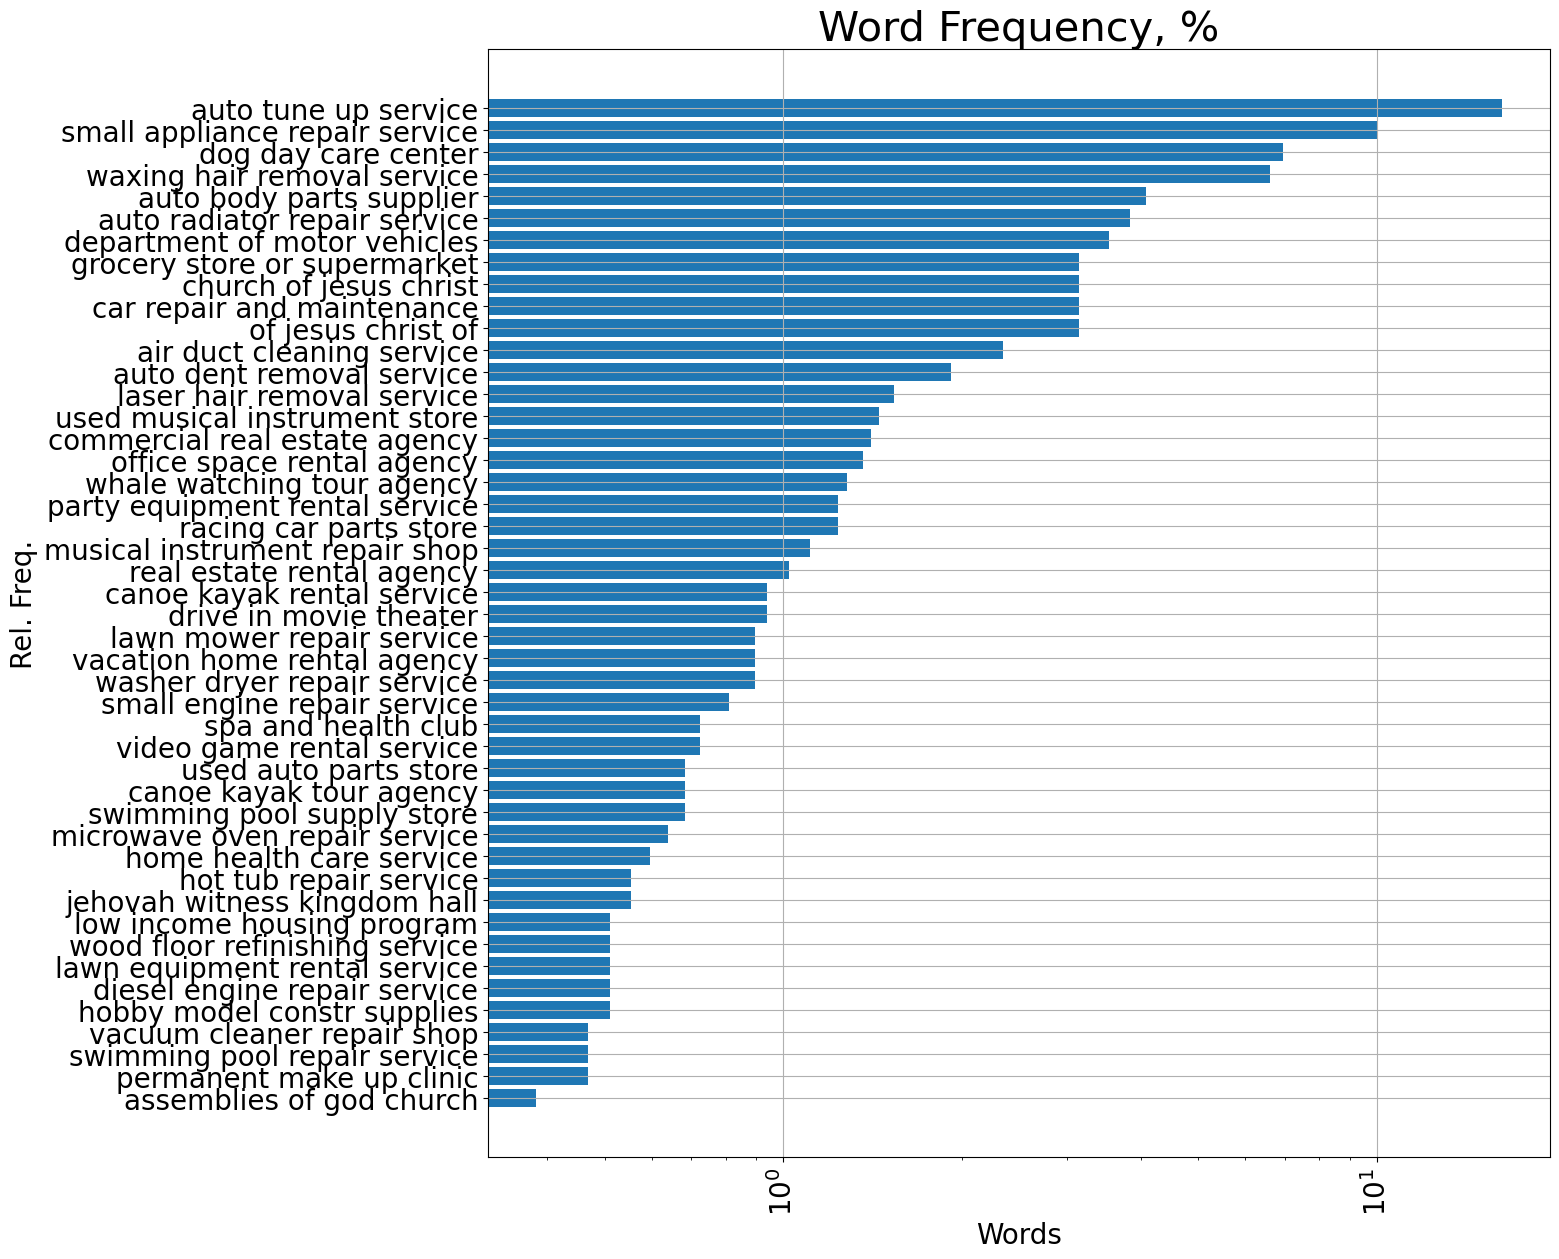

In [80]:
# df_.head()  # 5 rows × 1696 columns
freq_gate = 0.3  # 0.1->165; 1-> 12, 0.5-> 28
# To get largest on top in the plot, change def count_words default sorting
tmp_sorted = word_freq[word_freq>freq_gate].sort_values(ascending=True)
print(f'At word frequency gate {freq_gate}, there are {len(word_freq[word_freq>freq_gate])} words left')
plot_words(tmp_sorted.index, tmp_sorted.values)# Length: 1696
plt.tight_layout()
del tmp_sorted # remove

In [24]:
len(word_freq[word_freq>freq_gate])

49

In [25]:
# Now for the actual reviews

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# conda install -c anaconda scikit-learn
# from sklearn.feature_extraction.text import CountVectorizer

# import itertools
# flatten list of lists
# https://datascienceparichay.com/article/python-flatten-a-list-of-lists-to-a-single-list/

# using itertools
# df_surprise[~df_surprise['reviewText'].isnull()] filter the ones with actual reviews
# tmp_list_of_lists = df_surprise['reviewText'] #.tolist() # already a list ?
tmp_list_of_lists = df_surprise[~df_surprise['reviewText'].isnull()].reviewText # ~ not None
# 25554*100/104572  24.4% have no text
# flat_categories = list(itertools.chain(*tmp_list_of_lists))

corpus_reviews = tmp_list_of_lists.tolist() #flat_categories
# tmp_list_of_lists #.count(None)
# flat_categories

In [27]:
df_surprise[~df_surprise['reviewText'].isnull()].reviewText # non-empty reviews

103         Glazer's has been great for professional suppo...
190         I am a college student that is new to Auburn. ...
339                                 Terrible customer service
340                                      Best Bar in the Area
341         Best doctor I have met. Not the normal "in and...
                                  ...                        
11452946                   Milk shake to go is a rip off you.
11452954    7/23/11 Root canal treatment done with no pain...
11453496    To the "Google User"...it was SO kind and help...
11453627    Good food, killer staff and i can enjoy a smok...
11453628    Great food and staff. I can have a smoke in a ...
Name: reviewText, Length: 79018, dtype: object

In [74]:
type(corpus_reviews) # type list; 79018 pandas.core.series.Series
# corpus_reviews

list

In [77]:
%%time
# https://github.com/GalvanizeDataScience/lectures/blob/RFP/nlp/nlp-lecture.ipynb
# 1.3. Stemming and lemmatization
# Stemming means reducing each word to a stem. That is, reducing each word in all its diversity to a root common to all its variants.
# lemmatizer.lemmatize('better', pos='a') -> 'good'
# In [16]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# stemmer_porter = PorterStemmer()
# # tokens_stemporter = [list(map(stemmer_porter.stem, sent)) for sent in tokens_filtered]
# tokens_stemporter = [list(map(stemmer_porter.stem, sent)) for sent in corpus_reviews]
# print("--- sentence tokens (porter): {}".format(tokens_stemporter[2]))
# --- sentence tokens (porter): ['t', 'e', 'r', 'r', 'i', 'b', 'l', 'e', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e']
# CPU times: user 13.5 s, sys: 642 ms, total: 14.1 s
# Wall time: 14.2 s

# stemmer_snowball = SnowballStemmer('english')
# # tokens_stemsnowball = [list(map(stemmer_snowball.stem, sent)) for sent in tokens_filtered]
# tokens_stemsnowball = [list(map(stemmer_snowball.stem, sent)) for sent in corpus_reviews]
# print("--- sentence tokens (snowball): {}".format(tokens_stemsnowball[2]))
# --- sentence tokens (snowball): ['t', 'e', 'r', 'r', 'i', 'b', 'l', 'e', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e']
# CPU times: user 8.41 s, sys: 161 ms, total: 8.57 s
# Wall time: 8.61 s

lemmatizer = WordNetLemmatizer()
# tokens_lemmatizer = [list(map(lemmatizer.lemmatize, sent)) for sent in tokens_filtered]
tokens_lemmatizer = [list(map(lemmatizer.lemmatize, sent)) for sent in corpus_reviews]
print("--- sentence tokens (lemmatizer): {}".format(tokens_lemmatizer[2]))
# --- sentence tokens (lemmatizer): ['T', 'e', 'r', 'r', 'i', 'b', 'l', 'e', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e']
# CPU times: user 1min 9s, sys: 350 ms, total: 1min 10s
# Wall time: 1min 10s

lemmatizer.lemmatize('better', pos='a')
# 'good'

--- sentence tokens (lemmatizer): ['T', 'e', 'r', 'r', 'i', 'b', 'l', 'e', ' ', 'c', 'u', 's', 't', 'o', 'm', 'e', 'r', ' ', 's', 'e', 'r', 'v', 'i', 'c', 'e']
CPU times: user 1min 16s, sys: 1.13 s, total: 1min 18s
Wall time: 1min 19s


'good'

In [86]:
lemmatizer.lemmatize('better', pos='a')

'good'

In [139]:
%%time
# https://www.drjamesfroggatt.com/python-and-neural-networks/iopub-data-rate-exceeded-the-notebook-server-will-temporarily-stop-sending-output-to-the-client-in-order-to-avoid-crashing-it/
# https://jupyter-notebook.readthedocs.io/en/stable/config.html
# (tf2) alexey_imac@ALEXEYs-iMac C3_PROJECT % jupyter notebook --generate-config
# Writing default config to: /Users/alexey_imac/.jupyter/jupyter_notebook_config.py
# https://github.com/GalvanizeDataScience/lectures/blob/RFP/nlp/nlp-lecture.ipynb
# 1.5 Sklearn pipeline
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
ngram_range_tuple = (3,3) # how many words to combine min,max
max_features_count = 500 # 500 Wall time: 6.5 s
tf = CountVectorizer(strip_accents='ascii',
                     stop_words='english',
                     ngram_range=ngram_range_tuple,
                    analyzer='word',
                    max_features=max_features_count)

X = tf.fit_transform(corpus_reviews) #.todense()
document_tf_matrix = X.todense()

print(sorted(tf.vocabulary_))
print(document_tf_matrix)
# Wall time: 5.79 s

['10 15 minutes', '10 minutes later', '10 year old', '10 years ago', '20 minutes later', '24 hour fitness', '30 minutes later', 'able answer questions', 'absolutely love place', 'amazing customer service', 'amazing food great', 'amazing highly recommend', 'asked speak manager', 'atmosphere great service', 'authentic mexican food', 'auto repair shop', 'awesome customer service', 'awesome food great', 'awful customer service', 'bad customer service', 'ballard lock key', 'beer selection good', 'beer selection great', 'best car buying', 'best chinese food', 'best customer service', 'best fish chips', 'best happy hour', 'best ice cream', 'best indian food', 'best mexican food', 'best pizza ve', 'best place eat', 'best thai food', 'better business bureau', 'better customer service', 'black pine spas', 'bought brand new', 'bought new car', 'bought used car', 'brand new car', 'breakfast lunch dinner', 'breath fresh air', 'buy new car', 'buying new car', 'called customer service', 'called let k

In [140]:
# word_count, word_freq = count_words(vectorizer, X)
# type(vectorizer) # sklearn.feature_extraction.text.CountVectorizer
# type(X) # numpy.ndarray
#  ERROR
# word_count, word_freq = count_words(tf, document_tf_matrix)
# type(tf) # sklearn.feature_extraction.text.CountVectorizer
# type(document_tf_matrix) # numpy.matrix




In [141]:
# (tf) vectorizer = CountVectorizer(ngram_range=(1,1)) # Mexican restaurant insead of Mexican ngram_range=(5,5) church
# (document_tf_matrix)X  = vectorizer.fit_transform(corpus).toarray()
features = tf.get_feature_names()
word_count, word_freq = count_words(tf, X.toarray())
word_counted = 50 # at least
wcindex = np.sum(word_count > word_counted) #You set word_counted threshold
# To set to dataframe of word counts
df_ = pd.DataFrame(data=document_tf_matrix, columns=features)
# To grab the wcindex highest word frequencies.
# df2 = pd.concat([df2, df_.loc[:,word_count[:wcindex].index]], axis=1)

In [142]:
# tmp_sorted = word_freq[word_freq>freq_gate].sort_values(ascending=True)
# type(tmp_sorted.index) # pandas.core.indexes.base.Index
# len(tmp_sorted.index) 128

In [150]:
3959e6/48466953

81.68452429844311

At word frequency gate 0.5, there are 22 words left


<Figure size 640x480 with 0 Axes>

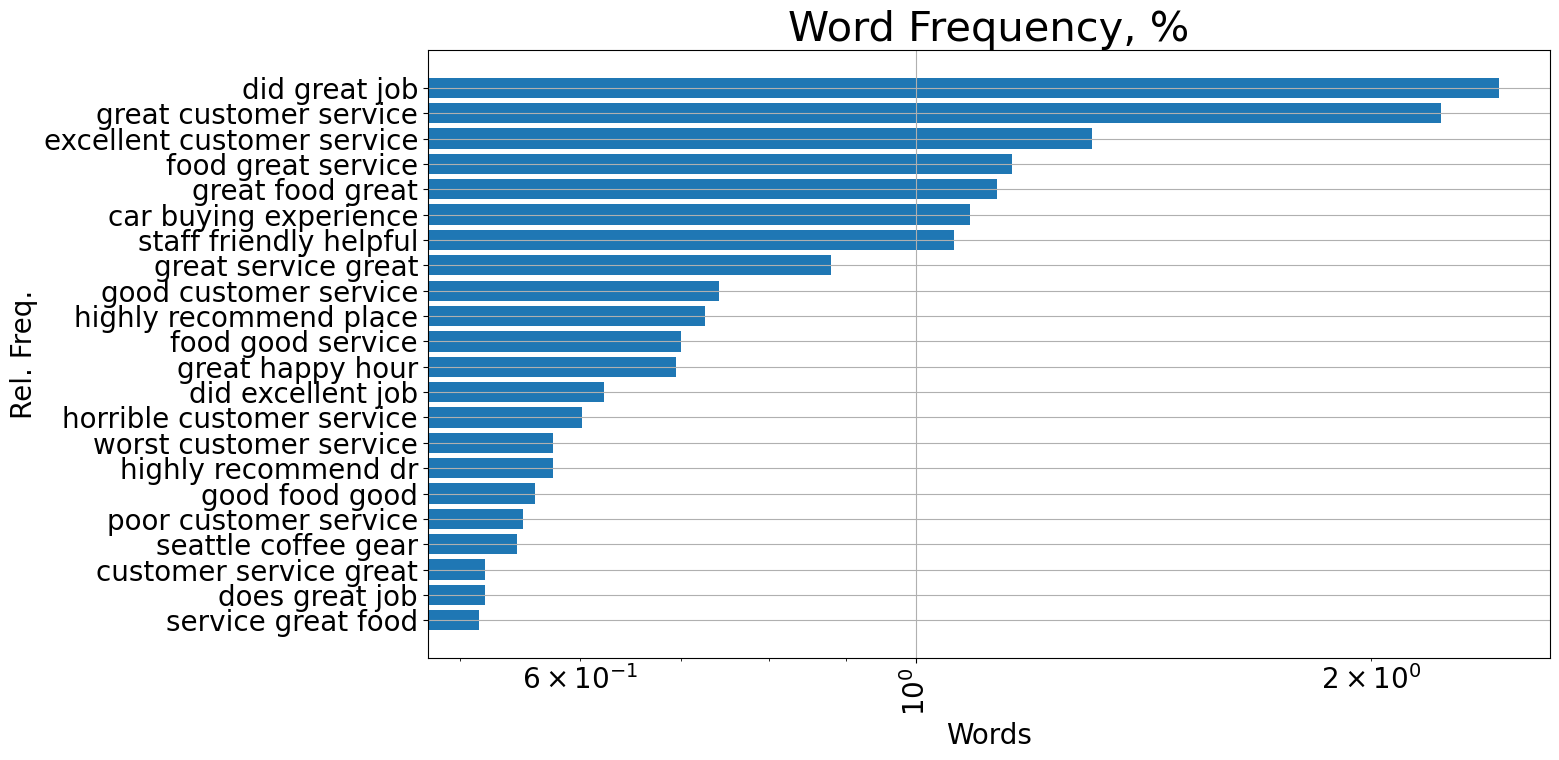

In [149]:
# df_.head()  # 5 rows × 1696 columns
freq_gate = 0.5 # 0.1->165; 1-> 12, 0.5-> 28
# To get largest on top in the plot, change def count_words default sorting
tmp_sorted = word_freq[word_freq>freq_gate].sort_values(ascending=True)
print(f'At word frequency gate {freq_gate}, there are {len(word_freq[word_freq>freq_gate])} words left')
plot_words(tmp_sorted.index, tmp_sorted.values)# Length: 1696
plt.tight_layout()
del tmp_sorted # remove

Pros and cons of content recommenders

While content recommendation took a back seat to collaborative recommendations after the Netflix challenge, there has lately been renewed interest in it. With all the social data out there now and with the use of semantic analysis, item features are now easer to create than in the past.

There are several benefits to content recommenders:

Easy to interpret reason for recommendations
Easy to modify recommendations by modifying the layout of item features
Can modify recommendations by weighting of user profile
Can avoid the Cold Start problem
Drawbacks:

Recommendations will not be diverse or unexpected
it is seen more as a replacement recommendation in many ways
Limited understanding of context
"If I like Sandra Bullock in action films and Meg Ryan in comedies, but if I hate Meg Ryan in action films and Sandra Bullock in comedies, there's no way for that to be captured in the feature vector" (Joeseph Konstan)
Needs features, which can be time consuming to extract from the data

In [32]:
%%time
# In [31]:
from math import log

def idf(frequency_matrix):
    df =  float(len(document_tf_matrix)) / sum(frequency_matrix > 0)
    return [log(i) for i in df.getA()[0]]
print(sorted(tf.vocabulary_))
print(idf(document_tf_matrix))
# Wall time: 23.3 s

['customer service', 'feel like', 'food good', 'food great', 'friendly helpful', 'friendly staff', 'good food', 'good service', 'great experience', 'great food', 'great job', 'great place', 'great service', 'happy hour', 'highly recommend', 'love place', 'make sure', 'really good', 'service great', 'staff friendly']
[3.173029645675376, 4.61941990772624, 4.273456816874308, 4.3294938849820195, 4.624567924243641, 4.488459210604818, 4.170824815869685, 4.649389577417455, 4.369675674614851, 4.082994102496653, 4.435815477119396, 3.816365439242705, 3.817516187355883, 4.4230764513419665, 3.2902462053635153, 4.398075149136549, 4.21352699212492, 4.469496009897062, 4.4157196131162575, 4.183196107672233]
CPU times: user 468 ms, sys: 5.55 ms, total: 473 ms
Wall time: 476 ms


In [ ]:
%%time
# In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
document_tfidf_matrix = tfidf.fit_transform(corpus_reviews)
print(sorted(tfidf.vocabulary_))
print(document_tfidf_matrix.todense())

# Wall time: 7.36 s

In [ ]:
from nltk.corpus import stopwords

stopwords_ = set(stopwords.words('english'))

print("--- stopwords in english: {}".format(stopwords_))

In [ ]:
type(corpus_reviews)

In [ ]:
corpus_reviews

In [ ]:
# Replace None with spaces? otherwise 
# TypeError: 'LazyCorpusLoader' object is not iterable

max_features = 150
vectorizer_reviews = CountVectorizer(analyzer="word", 
        max_features = max_features, 
        stop_words=stopwords, ngram_range=(1,1))

X_reviews = vectorizer_reviews.fit_transform([corpus_reviews]).toarray()
 
# wc1, wf1 = count_words(vectorizer_reviews, X_reviews)

In [ ]:
stopwords

In [ ]:
df_surprise[~df_surprise['reviewText'].isnull()].shape # (25554, 15) no text #head() #shape # (8175, 15) #head() #count()

In [ ]:
df_surprise.shape

In [ ]:
25554*100/104572  24.4%